In [15]:
import h5py
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from GNN.utils.cm import plot_confusion_matrix
from scipy.stats import binned_statistic
from GNN.utils.datautils import  get_data
from scipy.interpolate import interp1d

In [3]:
output_file = 'merged_dataframe.h5'
data_path = '/cosma6/data/dp004/dc-cues1/tng_dataframes/'
 
train, test = get_data(data_path + output_file, arg_label = 'dark_or_light')

In [7]:
nbins= 15
bins = np.logspace(np.log10(np.min(train.M200c)),
                   12, nbins+1)


In [8]:
nluminous, edges, _ = binned_statistic(train.M200c, train.labels, 
                                      statistic = 'mean',
                                      bins = bins)

In [9]:
center = 2.1e11
end = 5e11

In [37]:
# Find x for which y = 0.5
interpolator = interp1d(nluminous, (edges[1:]+edges[:-1])/2.)

center = interpolator(0.5)

end = ((edges[1:]+edges[:-1])/2.)[nluminous > 0.99][0]

In [38]:
nluminous

array([0.07374024, 0.18396085, 0.40262019, 0.68546638, 0.86789353,
       0.94688222, 0.96995505, 0.98679404, 0.99434652, 0.99541858,
       0.99745418, 0.99672989, 0.99835526, 0.99578059, 0.9924357 ])

In [39]:
end

369898981276.08527

Text(6e+11,0.5,'11469')

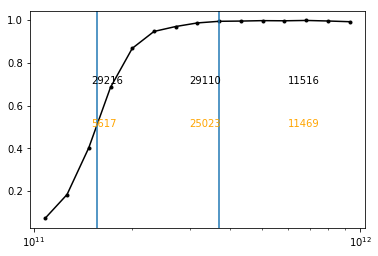

In [41]:
plt.semilogx((edges[1:]+edges[:-1])/2.,
           nluminous,color='black', marker='o',markersize=3)
plt.axvline(x = center)
plt.axvline(x = end)

plt.text(1.5e11, 0.7, str(len(train.M200c[train.M200c < center])))
plt.text(1.5e11, 0.5, str(np.sum(train.labels[train.M200c < center] > 0)), color = 'orange')

plt.text(3.e11, 0.7, str(len(train.M200c[(train.M200c >  center) & (train.M200c < end)])))
plt.text(3.e11, 0.5, str(np.sum(train.labels[(train.M200c >  center) & (train.M200c < end)] > 0)), color = 'orange')

plt.text(6.e11, 0.7, str(len(train.M200c[(train.M200c > end)])))
plt.text(6.e11, 0.5, str(np.sum(train.labels[train.M200c > end] > 0)), color = 'orange')


Text(0.5,0,'$M_{200c}$')

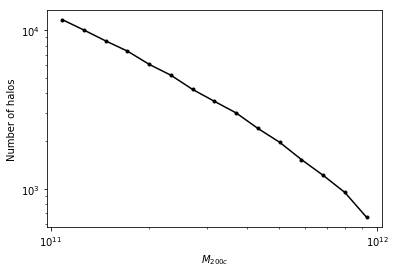

In [42]:



mass_func, edges = np.histogram(train.M200c, bins=bins)
plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='black', marker='o',markersize=3)

plt.ylabel('Number of halos')
plt.xlabel(r'$M_{200c}$')

In [43]:
thresholds = np.linspace(center, 5.*center, 20)

true_rate, false_rate = [], []
for t in thresholds:
    
    #print(f'Mass thresohld = {t:.2E}')
    prediction = test.M200c > t
    
    cm = confusion_matrix(test.labels, prediction)
    
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    true_dark = cm[0,0]
    true_lum = cm[1,1]
    false_dark = cm[0,1]
    false_lum = cm[1,0]
    
    true_rate.append(true_dark/(false_dark + true_dark))
    
    false_rate.append(false_lum/(false_lum + true_dark))
    

    
    #plt.semilogx((edges[1:]+edges[:-1])/2.,
    #       nluminous,color='black', marker='o',markersize=3)
    #plt.axvline(x =t)
    #plt.show()
    #plot_confusion_matrix(labels, prediction, classes = ['Dark', 'Luminous'], normalize = True)
    #plt.show()

In [46]:
true_dark = 0.94
true_lum = 0.93
false_dark = 0.06
false_lum = 0.07

true_rate_fcn = (true_dark/(false_dark + true_dark))

false_rate_fcn = (false_lum/(false_lum + true_dark))
    



Text(0.5,0,'False positive rate')

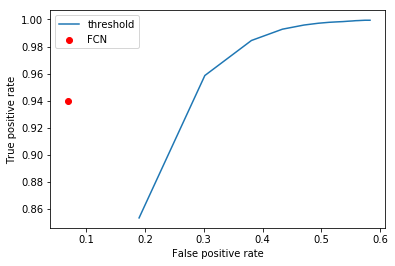

In [48]:
plt.plot(false_rate, true_rate, label = 'threshold')
plt.scatter(false_rate_fcn, true_rate_fcn, color = 'red', label = 'FCN')
plt.legend()
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')